## Project Description: Next Word Prediction Using LSTM
#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (LSTM) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: We use the text of Shakespeare's "Hamlet" as our dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

# 1. Data Collection

    The text of Shakespeare's Hamlet is used as the dataset.
    The nltk library is employed to fetch the text from the Gutenberg corpus.
    The raw text is saved locally as hamlet.txt.

In [315]:
#Required libraries
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg

#load the data
data = gutenberg.raw('shakespeare-hamlet.txt')

#save the text to file locally for processing
with open('hamlet.txt','w') as file:
    file.write(data)


[nltk_data] Downloading package gutenberg to C:\Users\chiru
[nltk_data]     charan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# Data Preprocessing
    Text Preprocessing: The text is tokenized into words, converted to lowercase, and split into input sequences for training.
    Tokenization: Assigns a unique integer index to each word.
    Sequence Creation: Creates input sequences for training by iterating through lines in the text and constructing n-grams.
    Padding: Ensures uniform length of input sequences by padding with zeros.

In [316]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenizer the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1 # Vocabulary size

In [317]:
#create the input sequence
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i +1]
        input_sequences.append(n_gram_sequence)
        
        
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')


In [318]:
max_sequence_len

14

In [319]:
input_sequences

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]], dtype=int32)

In [320]:
# Predictors (X) and Labels (Y)
x, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [321]:
x

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       ...,
       [   0,    0,    0, ...,  687,    4,   45],
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4]], dtype=int32)

In [322]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 3. Model Building
    LSTM Model
    Embedding Layer: Converts words into dense vector representations.
    LSTM Layers:
    Captures sequential dependencies in text.
    The first LSTM outputs sequences for the next LSTM layer.
    The second LSTM outputs a final feature vector.
    Dropout: Prevents overfitting by deactivating neurons randomly during training.
    Dense Layer: Predicts the next word by outputting probabilities across the vocabulary (softmax activation).


In [323]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1))  # Correct dimensions
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the summary
model.build(input_shape=(None, max_sequence_len-1))  # Build the model with input shape explicitly
model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ (None, 13, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 13, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 13, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

 # Diagram: LSTM Architecture


    Input Sequence (X) → Embedding → LSTM (150 units) → Dropout (20%) → LSTM (100 units) → Dense (Softmax) → Predicted Word (Y)


# 4. Model Training
    Early Stopping: Monitors validation loss and stops training when improvement stalls.
    Training Process: Model is trained on the input sequences (x_train, y_train) and validated against the test set.

In [324]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Compile model
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Train the model
history = model.fit(
    x, y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.0262 - loss: 7.2357 - val_accuracy: 0.0383 - val_loss: 6.8701 - learning_rate: 0.0010
Epoch 2/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.0341 - loss: 6.4658 - val_accuracy: 0.0369 - val_loss: 6.9911 - learning_rate: 0.0010
Epoch 3/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.0383 - loss: 6.3676 - val_accuracy: 0.0462 - val_loss: 7.0375 - learning_rate: 0.0010
Epoch 4/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.0447 - loss: 6.2693 - val_accuracy: 0.0468 - val_loss: 7.0763 - learning_rate: 0.0010
Epoch 5/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.0557 - loss: 6.0787 - val_accuracy: 0.0455 - val_loss: 7.1066 - learning_rate: 5.0000e-04
Epoch 6/100
322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.0532 - loss: 6.0104 - val_accuracy: 0.0462 - val_loss: 7.1320 - learning_rate: 5.0000e-04


# Visualizing Training Results
    After training, plot the loss and accuracy to evaluate the model's performance.

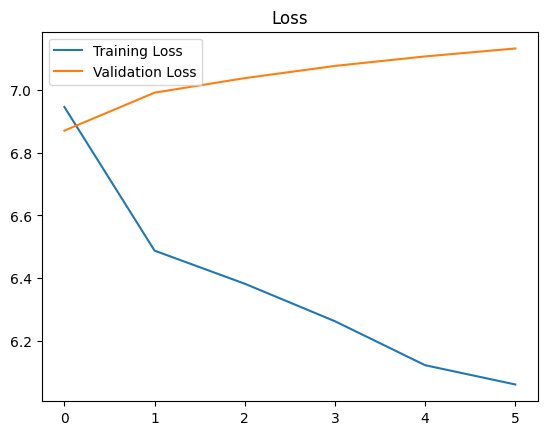

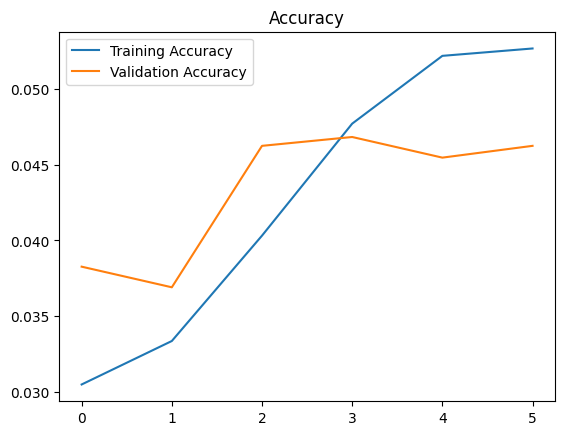

In [325]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


# Function for Predicting the Next Word
    This function takes the trained model, tokenizer, input text, and sequence length, and predicts the next word.



In [326]:
import numpy as np

# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len, temperature=1.0):
    # Convert input text to a sequence
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    
    # Predict probabilities
    predicted = model.predict(token_list, verbose=0)[0]
    
    # Apply temperature scaling
    scaled_probs = np.exp(np.log(predicted) / temperature)
    scaled_probs = scaled_probs / np.sum(scaled_probs)
    
    # Sample a word index from the probability distribution
    predicted_word_index = np.random.choice(range(len(scaled_probs)), p=scaled_probs)
    
    # Map index back to word
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return "No prediction"




In [327]:
input_text = "To be or not to be"
next_word = predict_next_word(model, tokenizer, input_text, max_sequence_len, temperature=1.0)
print(f"Input Text: {input_text}")
print(f"Next Word Prediction: {next_word}")


Input Text: To be or not to be
Next Word Prediction: did


In [329]:
input_text = "Barn. Last night of all,When yond same"
next_word = predict_next_word(model, tokenizer, input_text, max_sequence_len, temperature=1.0)
print(f"Input Text: {input_text}")
print(f"Next Word Prediction: {next_word}")


Input Text: Barn. Last night of all,When yond same
Next Word Prediction: seeme


In [331]:
## Save the model
model.save("next_word_lstm.h5")
## Save the tokenizer
import pickle
with open('tokenizer.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [332]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:cold
